In [71]:
import pandas as pd
import seaborn as sns

In [2]:
# Loading the data

# Contains the date of the order, the restaurant ID, type of order (Delivery, Pick up, in store) and the food ordered
df_orders = pd.read_pickle('orders.pickle')

# Contains the restaurant ID and where it's located (Columbia, Midtown, Flatiron...)
df_restaurants = pd.read_pickle('restaurants.pickle')

# Conatins the item's name and the item's ID
df_items = pd.read_pickle('items.pickle')

# Contains the temperature and date
df_weather = pd.read_pickle('weather.pickle')

In [3]:
# Looking at the first 5 rows of the orders df
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Charred Broccoli with Lemon,Cauliflower with Garlic and Parmesan
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,Spicy Meatballs Marketbowl,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese
4,O1443303,2018-08-12 18:04:44,R10006,DELIVERY,0.0,0.0,I1,I6,I10,I11,Spicy Meatballs Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon


In [4]:
df_orders.shape

(2392366, 14)

In [5]:
# Looking at the first 5 rows of the restaurants df
df_restaurants.head()

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,2014-08-09,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,2013-03-19,2018-05-01
2,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,2013-05-21,2018-05-01
3,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,2013-11-14,2016-03-05
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,2014-01-10,2017-01-01


In [6]:
# Looking at the first 5 rows of the items df
df_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I0,Charred Chicken Marketbowl,Mains
1,I1,Spicy Meatballs Marketbowl,Mains
2,I2,Grilled Organic Tofu Marketbowl,Mains
3,I3,Herb Roasted Chicken Marketbowl,Mains
4,I4,Roasted Wild Alaskan Salmon Marketbowl,Mains


In [7]:
# Questions to answers

# Question 1: Are Salad Eaters Healthier?


In [8]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Charred Broccoli with Lemon,Cauliflower with Garlic and Parmesan
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,Spicy Meatballs Marketbowl,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese
4,O1443303,2018-08-12 18:04:44,R10006,DELIVERY,0.0,0.0,I1,I6,I10,I11,Spicy Meatballs Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon


In [9]:
# There are 3 options in the many from which 2 are salads.
df_orders['BASE_NAME'].value_counts()

Farm Greens with Mint           1028383
Classic Brown Rice               790563
Farro with Summer Vegetables     451770
Name: BASE_NAME, dtype: int64

In [10]:
# 65 percent of the Base orders were salad.
((df_orders.BASE_NAME == 'Farm Greens with Mint').sum() + (df_orders.BASE_NAME == 'Farro with Summer Vegetables').sum()) / df_orders.BASE_NAME.value_counts().sum()

0.6518441760220124

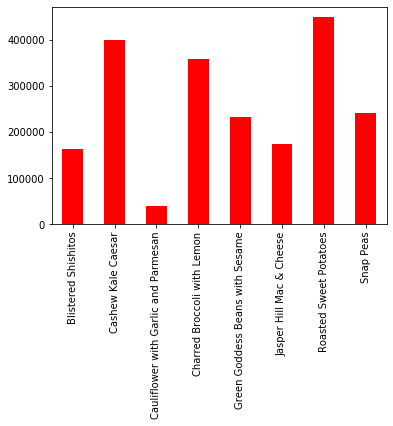

In [11]:
# After taking all sides from the people who ordered Farm Greens with Mint as their Base
# We could see that the sides that were the most frequent were Roasted Sweet Potatoes and Cashew Kale Caesar

(pd.concat([df_orders[df_orders['BASE_NAME'] == 'Farm Greens with Mint'].SIDE_1_NAME, 
           df_orders[df_orders['BASE_NAME'] == 'Farm Greens with Mint'].SIDE_2_NAME]).value_counts().sort_index().plot(kind='bar', color='red'))

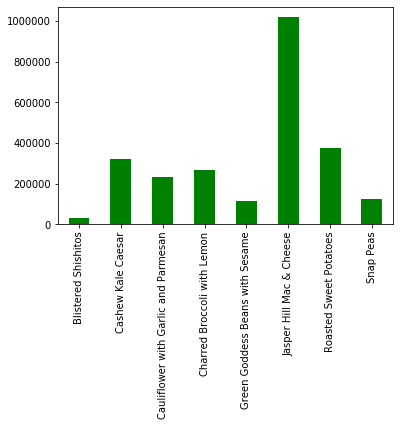

In [12]:
# After taking all sides from the people who ordered Farm Greens with Mint as their Base
# We could see that the Mac and Chesse (Not super healthy) was by far the most ordered item

(pd.concat([df_orders[df_orders['BASE_NAME'] != 'Farm Greens with Mint'].SIDE_1_NAME, 
           df_orders[df_orders['BASE_NAME'] != 'Farm Greens with Mint'].SIDE_2_NAME]).value_counts().sort_index().plot(kind='bar', color='green'))

In [13]:
# People who ordered Farm Greens with Mint got less cookies than people who ordered other Base plates

pd.DataFrame(df_orders.groupby("BASE_NAME").COOKIES.mean())

,COOKIES
BASE_NAME,
Classic Brown Rice,0.357342
Farm Greens with Mint,0.102315
Farro with Summer Vegetables,0.382144


In [14]:
df_orders.SIDE_1_NAME.value_counts()

Roasted Sweet Potatoes                  740827
Charred Broccoli with Lemon             444562
Cashew Kale Caesar                      419749
Jasper Hill Mac & Cheese                259377
Cauliflower with Garlic and Parmesan    130893
Green Goddess Beans with Sesame         116432
Snap Peas                                88890
Blistered Shishitos                      69986
Name: SIDE_1_NAME, dtype: int64

In [15]:
df_orders['SIDE_1_NAME'].value_counts()

Roasted Sweet Potatoes                  740827
Charred Broccoli with Lemon             444562
Cashew Kale Caesar                      419749
Jasper Hill Mac & Cheese                259377
Cauliflower with Garlic and Parmesan    130893
Green Goddess Beans with Sesame         116432
Snap Peas                                88890
Blistered Shishitos                      69986
Name: SIDE_1_NAME, dtype: int64

Roasted Sweet Potatoes


<IPython.core.display.Javascript object>

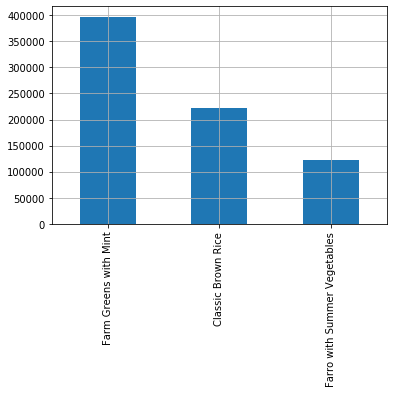

Charred Broccoli with Lemon


<IPython.core.display.Javascript object>

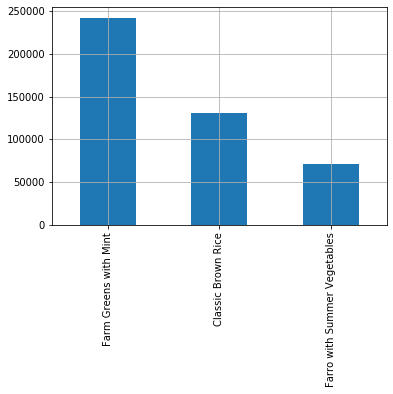

Cashew Kale Caesar


<IPython.core.display.Javascript object>

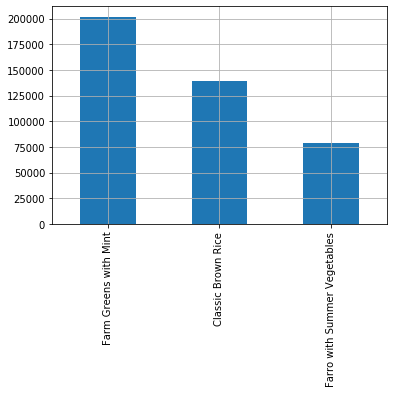

Jasper Hill Mac & Cheese


<IPython.core.display.Javascript object>

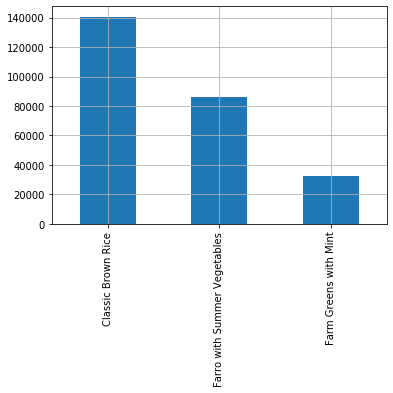

Cauliflower with Garlic and Parmesan


<IPython.core.display.Javascript object>

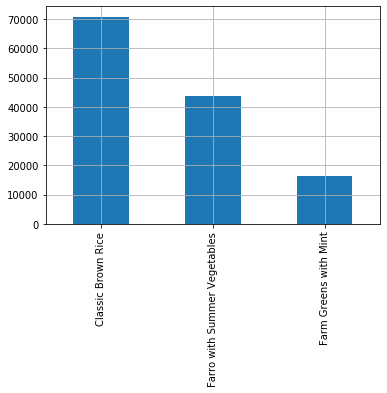

Green Goddess Beans with Sesame


<IPython.core.display.Javascript object>

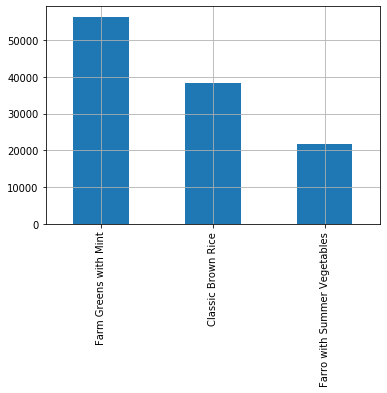

Snap Peas


<IPython.core.display.Javascript object>

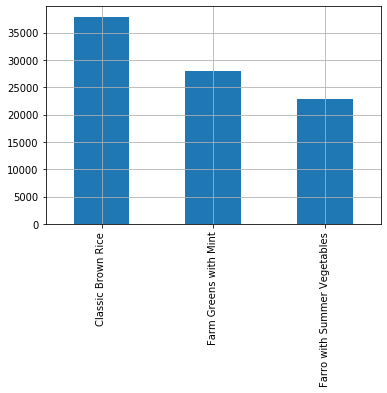

Blistered Shishitos


<IPython.core.display.Javascript object>

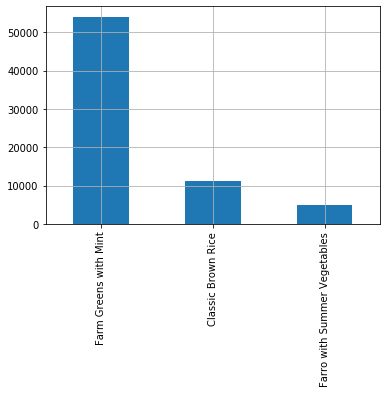

In [16]:
# We can look at the frequency of each Base  when ordered with the different sides 1

sides = ['Roasted Sweet Potatoes', 'Charred Broccoli with Lemon', 'Cashew Kale Caesar', 'Jasper Hill Mac & Cheese',
        'Cauliflower with Garlic and Parmesan', 'Green Goddess Beans with Sesame', 'Snap Peas', 'Blistered Shishitos']

for side in sides:
    print(side)
    df_orders[df_orders['SIDE_1_NAME'] == side].BASE_NAME.value_counts().plot(kind='bar', grid=True)
    plt.show()

Roasted Sweet Potatoes


<IPython.core.display.Javascript object>

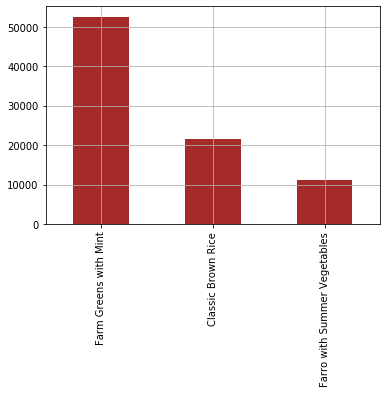

Charred Broccoli with Lemon


<IPython.core.display.Javascript object>

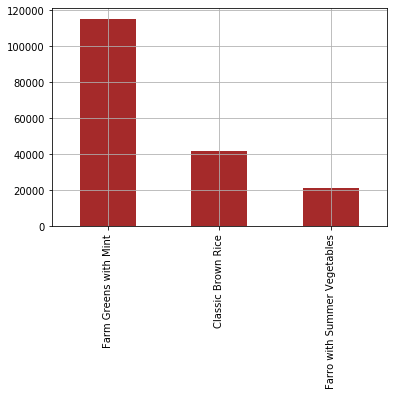

Cashew Kale Caesar


<IPython.core.display.Javascript object>

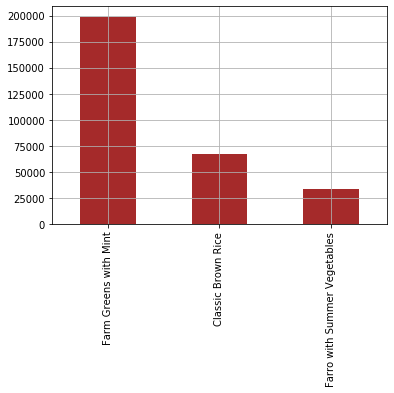

Jasper Hill Mac & Cheese


<IPython.core.display.Javascript object>

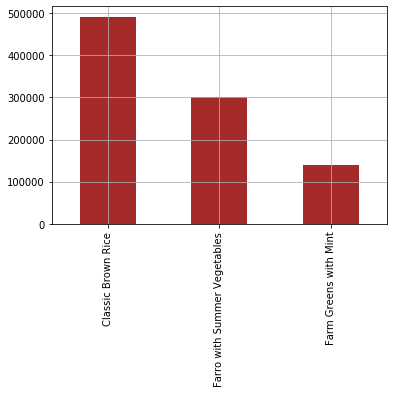

Cauliflower with Garlic and Parmesan


<IPython.core.display.Javascript object>

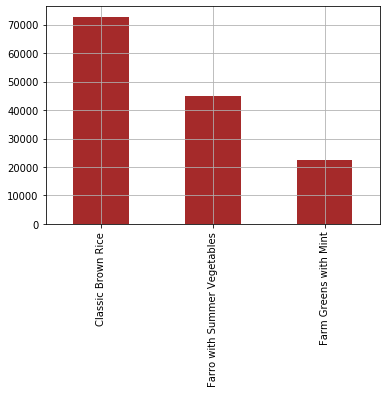

Green Goddess Beans with Sesame


<IPython.core.display.Javascript object>

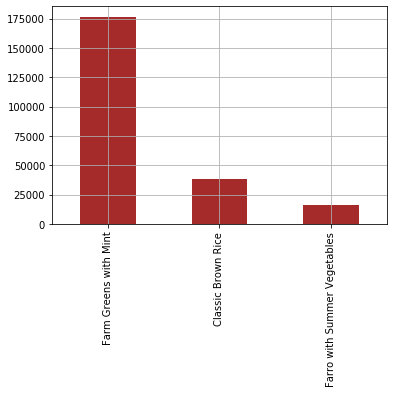

Snap Peas


<IPython.core.display.Javascript object>

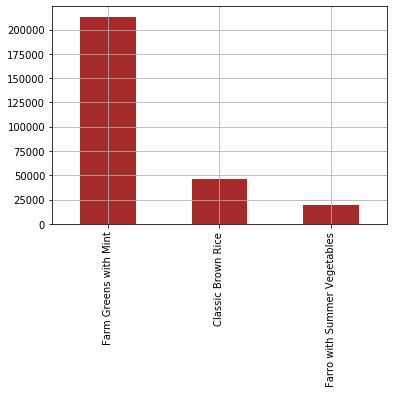

Blistered Shishitos


<IPython.core.display.Javascript object>

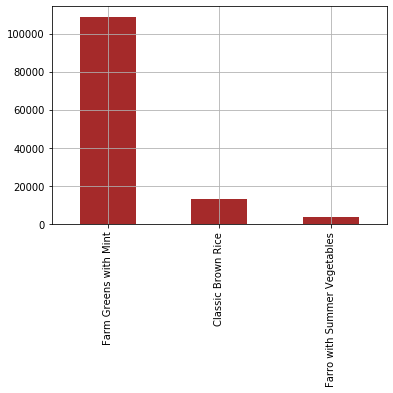

In [17]:
# We can look at the frequency of each Base  when ordered with the different sides 2

sides = ['Roasted Sweet Potatoes', 'Charred Broccoli with Lemon', 'Cashew Kale Caesar', 'Jasper Hill Mac & Cheese',
        'Cauliflower with Garlic and Parmesan', 'Green Goddess Beans with Sesame', 'Snap Peas', 'Blistered Shishitos']

for side in sides:
    print(side)
    df_orders[df_orders['SIDE_2_NAME'] == side].BASE_NAME.value_counts().plot(kind='bar', grid=True, color='brown')
    plt.show()


Salad eaters are healthier.
    

# Question 2: Where should we launch drinks?

In [19]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Charred Broccoli with Lemon,Cauliflower with Garlic and Parmesan
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,Spicy Meatballs Marketbowl,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese
4,O1443303,2018-08-12 18:04:44,R10006,DELIVERY,0.0,0.0,I1,I6,I10,I11,Spicy Meatballs Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon


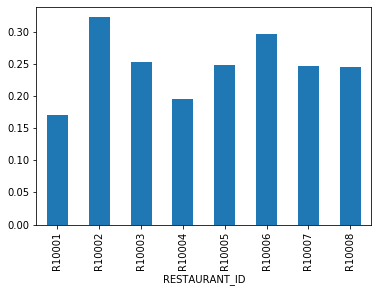

In [20]:
# grouping by each restaurant and checking the average of drinks at each location 
df_orders.groupby('RESTAURANT_ID').DRINKS.mean().plot(kind='bar')

In [21]:
# Putting the plot from above into a dataframe
df_orders.groupby('RESTAURANT_ID').DRINKS.mean().reset_index()

,RESTAURANT_ID,DRINKS
0,R10001,0.170627
1,R10002,0.322107
2,R10003,0.252605
3,R10004,0.195951
4,R10005,0.247893
5,R10006,0.295655
6,R10007,0.246052
7,R10008,0.244597


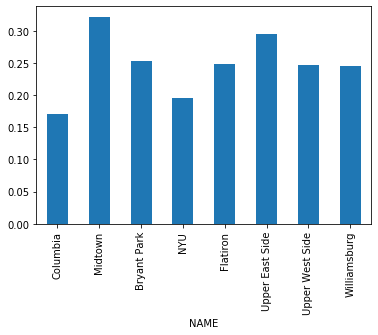

In [22]:
# Merging tables to make visualization more clear.
pd.merge(df_orders.groupby('RESTAURANT_ID').DRINKS.mean().reset_index(), 
         df_restaurants[['RESTAURANT_ID', 'NAME']],
         on='RESTAURANT_ID',
         how='left',
         validate='one_to_one').set_index('NAME').DRINKS.plot(kind='bar')

Midtown and Upper East Side seem to be great places to launch drinks

# Question 3: Order Modality by store

In [24]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Charred Broccoli with Lemon,Cauliflower with Garlic and Parmesan
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,Spicy Meatballs Marketbowl,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese
4,O1443303,2018-08-12 18:04:44,R10006,DELIVERY,0.0,0.0,I1,I6,I10,I11,Spicy Meatballs Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon


In [25]:
# Creating columns for each type
types = ['PICKUP', 'IN_STORE', 'DELIVERY']

for _type in types:
    df_orders[_type] = (df_orders.TYPE == _type)

In [26]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,PICKUP,IN_STORE,DELIVERY
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Charred Broccoli with Lemon,Cauliflower with Garlic and Parmesan,True,False,False
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,Spicy Meatballs Marketbowl,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese,False,True,False
4,O1443303,2018-08-12 18:04:44,R10006,DELIVERY,0.0,0.0,I1,I6,I10,I11,Spicy Meatballs Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon,False,False,True


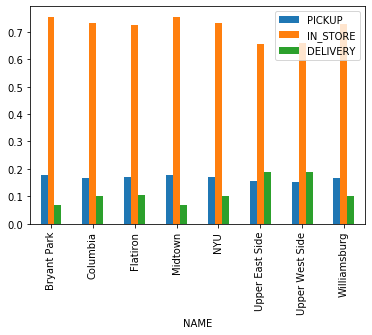

In [27]:
# Added the restaurant names to the df_orders dataframe

if "NAME" not in df_orders:
    df_orders = pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']], 
                     on='RESTAURANT_ID', how='left', validate='many_to_one')

# group by restaurant and find the mean of each type
modalities = df_orders.groupby('NAME')[types].mean()
modalities.plot(kind = 'bar')

PICKUP


<IPython.core.display.Javascript object>

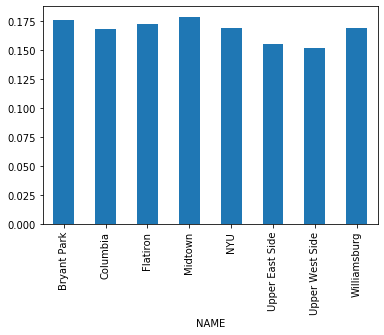

IN_STORE


<IPython.core.display.Javascript object>

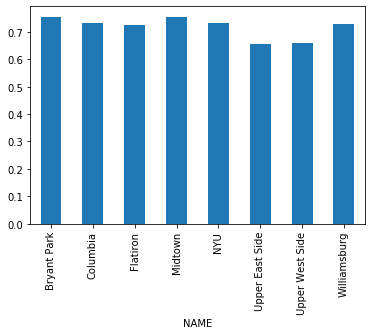

DELIVERY


<IPython.core.display.Javascript object>

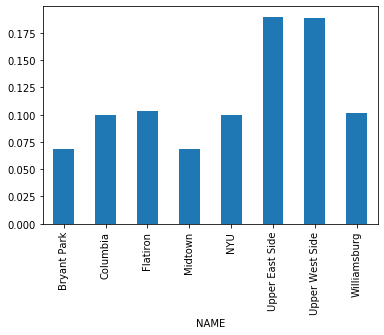

In [28]:
# creating a column for each type
# it will contain the type if the order if of that type
types = ['PICKUP', 'IN_STORE', 'DELIVERY']

for i in types:
    print(i)
    modalities[i].plot(kind='bar')
    plt.show()

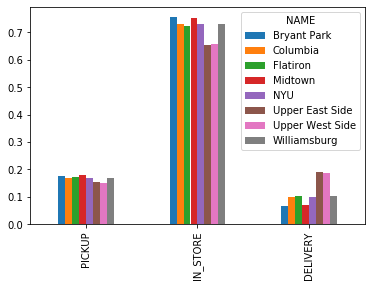

In [29]:
# looking at it from a different perspective
modalities.transpose().plot(kind='bar')

In store modality's the most common one

# Question 4: Daily patterns by restaurant

In [30]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,PICKUP,IN_STORE,DELIVERY,NAME
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,Columbia
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,Upper East Side
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Charred Broccoli with Lemon,Cauliflower with Garlic and Parmesan,True,False,False,Midtown
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,Spicy Meatballs Marketbowl,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese,False,True,False,Upper West Side
4,O1443303,2018-08-12 18:04:44,R10006,DELIVERY,0.0,0.0,I1,I6,I10,I11,Spicy Meatballs Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon,False,False,True,Upper East Side


In [31]:
# checking each column's data type
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392366 entries, 0 to 2392365
Data columns (total 18 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ORDER_ID       object        
 1   DATETIME       datetime64[ns]
 2   RESTAURANT_ID  object        
 3   TYPE           object        
 4   DRINKS         float64       
 5   COOKIES        float64       
 6   MAIN           object        
 7   BASE           object        
 8   SIDE_1         object        
 9   SIDE_2         object        
 10  MAIN_NAME      object        
 11  BASE_NAME      object        
 12  SIDE_1_NAME    object        
 13  SIDE_2_NAME    object        
 14  PICKUP         bool          
 15  IN_STORE       bool          
 16  DELIVERY       bool          
 17  NAME           object        
dtypes: bool(3), datetime64[ns](1), float64(2), object(12)
memory usage: 298.9+ MB


In [32]:
# We have records from January, 1st until December, 31st.

df_orders.DATETIME.dt.date.min()

datetime.date(2018, 1, 1)

In [33]:
df_orders.DATETIME.dt.date.max()

datetime.date(2018, 12, 31)

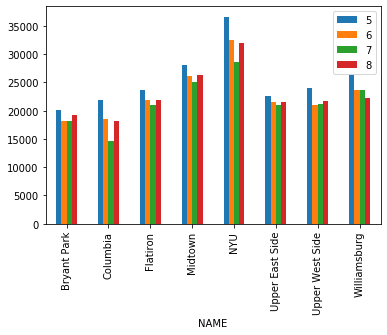

In [34]:
# how well each restaurant did over the summer: May, June, July, August.

# merging the restaurant names to the df_orders dataframe
if "NAME" not in df_orders:
    pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']],
             on='RESTAURANT_ID', how='left', validate='many_to_one')


# creating columns for each month of the summer
summer = [5, 6, 7, 8]
for i in summer:
    df_orders[i] = (df_orders.DATETIME.dt.month == i)
    
# grouping by each restaurant and displaying the total sum of sales in each month
df_orders.groupby('NAME')[summer].sum().plot(kind='bar')




In [35]:
# creating a list with the restaurant's names
all_ids = df_orders.NAME.unique().tolist()

<IPython.core.display.Javascript object>

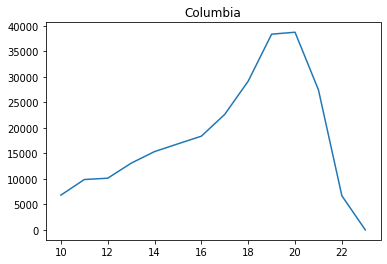

<IPython.core.display.Javascript object>

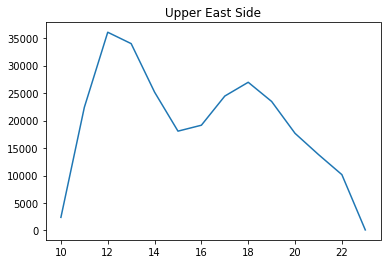

<IPython.core.display.Javascript object>

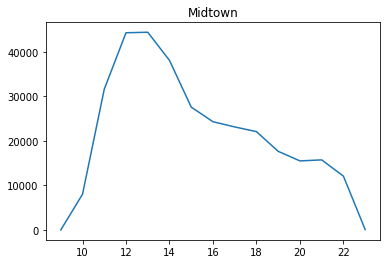

<IPython.core.display.Javascript object>

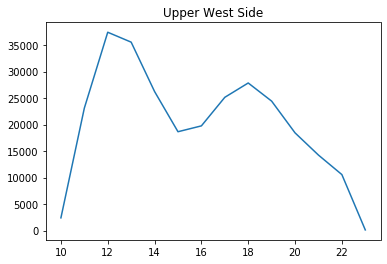

<IPython.core.display.Javascript object>

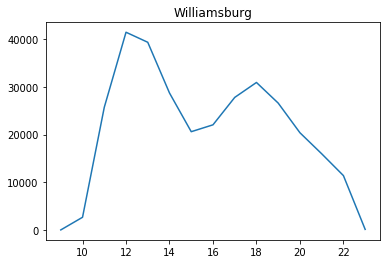

<IPython.core.display.Javascript object>

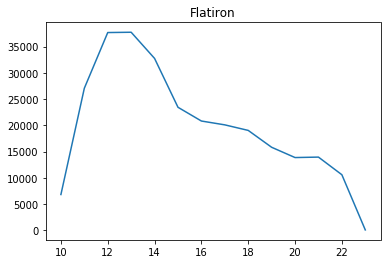

<IPython.core.display.Javascript object>

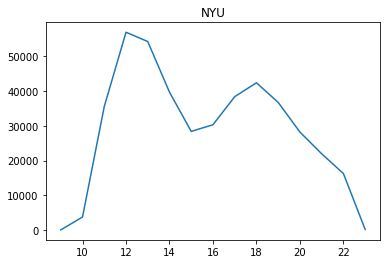

<IPython.core.display.Javascript object>

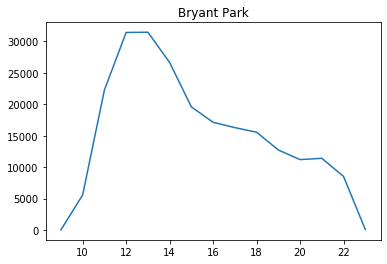

In [36]:
for i in all_ids:
    df_orders[df_orders.NAME == i].DATETIME.dt.hour.value_counts().sort_index().plot(title=i)
    plt.show()

# Question 5: Weather Patterns


In [38]:
df_weather.head()

,DATETIME,TEMPERATURE,PRECIP
0,2018-01-01 00:00:00,9.17,0.0
1,2018-01-01 01:00:00,9.17,0.0
2,2018-01-01 02:00:00,9.17,0.0
3,2018-01-01 03:00:00,8.24,0.0
4,2018-01-01 04:00:00,8.24,0.0


In [39]:
# Creating two new columns (Hour and Date) for the orders dataframe
df_orders['HOUR'] = df_orders.DATETIME.dt.hour
df_orders['DATE'] = df_orders.DATETIME.dt.date

In [40]:
# Creating two new columns (Hour and Date) for the weather dataframe
df_weather['HOUR'] = df_weather.DATETIME.dt.hour
df_weather['DATE'] = df_weather.DATETIME.dt.date

In [41]:
# dropping the DATETIME colunm in place
df_weather.drop('DATETIME', axis=1, inplace=True)

In [51]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,...,PICKUP,IN_STORE,DELIVERY,NAME,5,6,7,8,HOUR,DATE
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,NaN,NaN,NaN,NaN,...,True,False,False,Columbia,False,False,False,False,19,2018-12-07
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,...,False,True,False,Upper East Side,False,False,True,False,21,2018-07-14
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,...,True,False,False,Midtown,False,False,False,False,13,2018-04-12
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,...,False,True,False,Upper West Side,False,False,False,True,18,2018-08-21
4,O1443303,2018-08-12 18:04:44,R10006,DELIVERY,0.0,0.0,I1,I6,I10,I11,...,False,False,True,Upper East Side,False,False,False,True,18,2018-08-12


In [58]:
# grouping by HOUR and DATE and checking the different modalities (In store, pick up, delivery) and drink's mean
# and putting it into a dataframe
df_orders_hours = df_orders.groupby(['HOUR', 'DATE'])[types + ['DRINKS']].mean().reset_index()

In [63]:
# Joining the new dataframe that we created in the previous cell and merging it with the weather dataframe
orders_weather = pd.merge(df_orders_hours, df_weather, on=['HOUR', 'DATE'], how='left', validate='one_to_one')

In [70]:
# Looking at the new dataframe's correlation
orders_weather.corr()

,HOUR,PICKUP,IN_STORE,DELIVERY,DRINKS,TEMPERATURE,PRECIP
HOUR,1.000000,-0.006322,-0.068066,0.093179,-0.061868,-0.047194,0.002848
PICKUP,-0.006322,1.000000,-0.637112,-0.176837,-0.046693,0.013856,-0.044497
IN_STORE,-0.068066,-0.637112,1.000000,-0.645959,0.012734,-0.026696,-0.065803
DELIVERY,0.093179,-0.176837,-0.645959,1.000000,0.029984,0.020407,0.128077
DRINKS,-0.061868,-0.046693,0.012734,0.029984,1.000000,0.460687,-0.042215
TEMPERATURE,-0.047194,0.013856,-0.026696,0.020407,0.460687,1.000000,-0.028219
PRECIP,0.002848,-0.044497,-0.065803,0.128077,-0.042215,-0.028219,1.000000


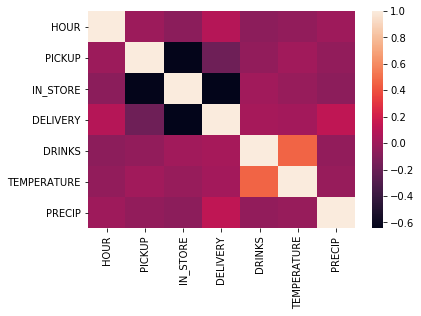

In [72]:
# heatmap using seaborn library for better visualization
sns.heatmap(orders_weather.corr())

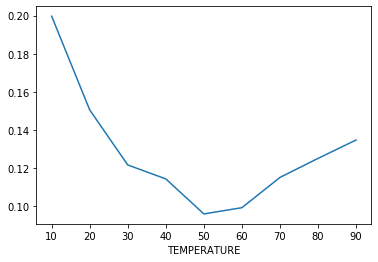

In [78]:
# checking the mean of deliveries made based oon the weather
orders_weather.groupby((orders_weather.TEMPERATURE / 10).round()*10).DELIVERY.mean().plot()

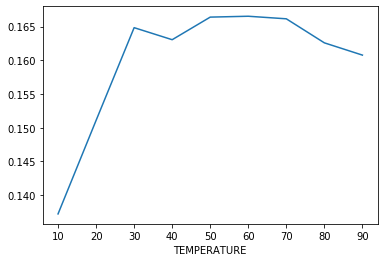

In [83]:
# checking the mean of pick ups made based oon the weather
orders_weather.groupby((orders_weather.TEMPERATURE / 10).round()*10).PICKUP.mean().plot()

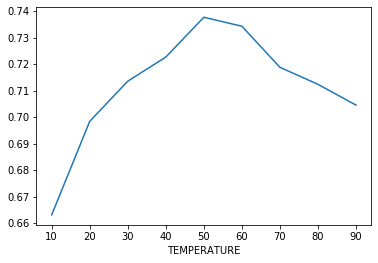

In [85]:
# checking the mean of in store eating made based oon the weather
orders_weather.groupby((orders_weather.TEMPERATURE / 10).round()*10).IN_STORE.mean().plot()

when it was cold there were a lot more deliveries than when it was hot